In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [18]:
df_profile = pd.read_excel("A2 - Profile.xlsx")
df_survey = pd.read_excel("A2 - Survey.xlsx")


In [19]:
df_merged = df_profile.merge(df_survey, left_on="CustomerID", right_on="customerID", how="inner")
df_merged


,CustomerID,Age,Job,Marital_status,Education,Credict_Payment,customerID,Shopping type,Product-quality,Deli-quality,Service-quality,Shopping_comfort,LoyaltyCard_of_Others?
0,1,30,blue-collar,married,basic.9y,no,1.0,In-store,6.0,4.0,10.0,8,Yes
1,1,30,blue-collar,married,basic.9y,no,1.0,In-store,2.0,2.0,6.0,4,Yes
2,2,39,services,single,high.school,no,2.0,In-store,8.0,0.0,0.0,6,No
3,2,39,services,single,high.school,no,2.0,In-store,6.0,2.0,2.0,2,Yes
4,3,25,services,married,high.school,no,3.0,In-store,10.0,6.0,0.0,8,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2245,1825,34,services,married,high.school,no,1825.0,In-store,6.0,6.0,8.0,6,Yes
2246,1826,49,management,married,university.degree,no,1826.0,Delivery,8.0,4.0,6.0,8,Yes
2247,1827,50,blue-collar,divorced,basic.4y,no,1827.0,In-store,2.0,2.0,8.0,6,Yes
2248,1828,51,entrepreneur,married,university.degree,no,1828.0,In-store,2.0,4.0,10.0,4,Yes


In [20]:
## preprocessing
enc = OrdinalEncoder()

#hot encoding cetegorical features
df_merged[["Job", "Marital_status", "Education", "Credict_Payment", "Shopping type"]] = enc.fit_transform(df_merged[["Job", "Marital_status", "Education", "Credict_Payment", "Shopping type"]])

#drop blank rows
df_merged = df_merged.dropna(subset=["Marital_status", "Credict_Payment"])
df_merged = df_merged.drop(columns=["CustomerID","Product-quality", "Deli-quality", "customerID", "Service-quality", "Shopping_comfort", "LoyaltyCard_of_Others?"])


In [21]:

#split into training set and test set
df_train = df_merged[:1790]
df_test = df_merged[1790:]


In [22]:
#fit
X_train = df_train[["Age", "Job", "Marital_status", "Education", "Credict_Payment"]]
Y_train = df_train["Shopping type"]
clf = DecisionTreeClassifier(min_samples_split=35)
clf = clf.fit(X_train, Y_train)

In [23]:
#test
X_test = df_test[["Age", "Job", "Marital_status", "Education", "Credict_Payment"]]
Y_test = df_test["Shopping type"]

predicted = clf.predict(X_test)
accuracy = accuracy_score(predicted, Y_test)
print(accuracy)

0.7254464285714286


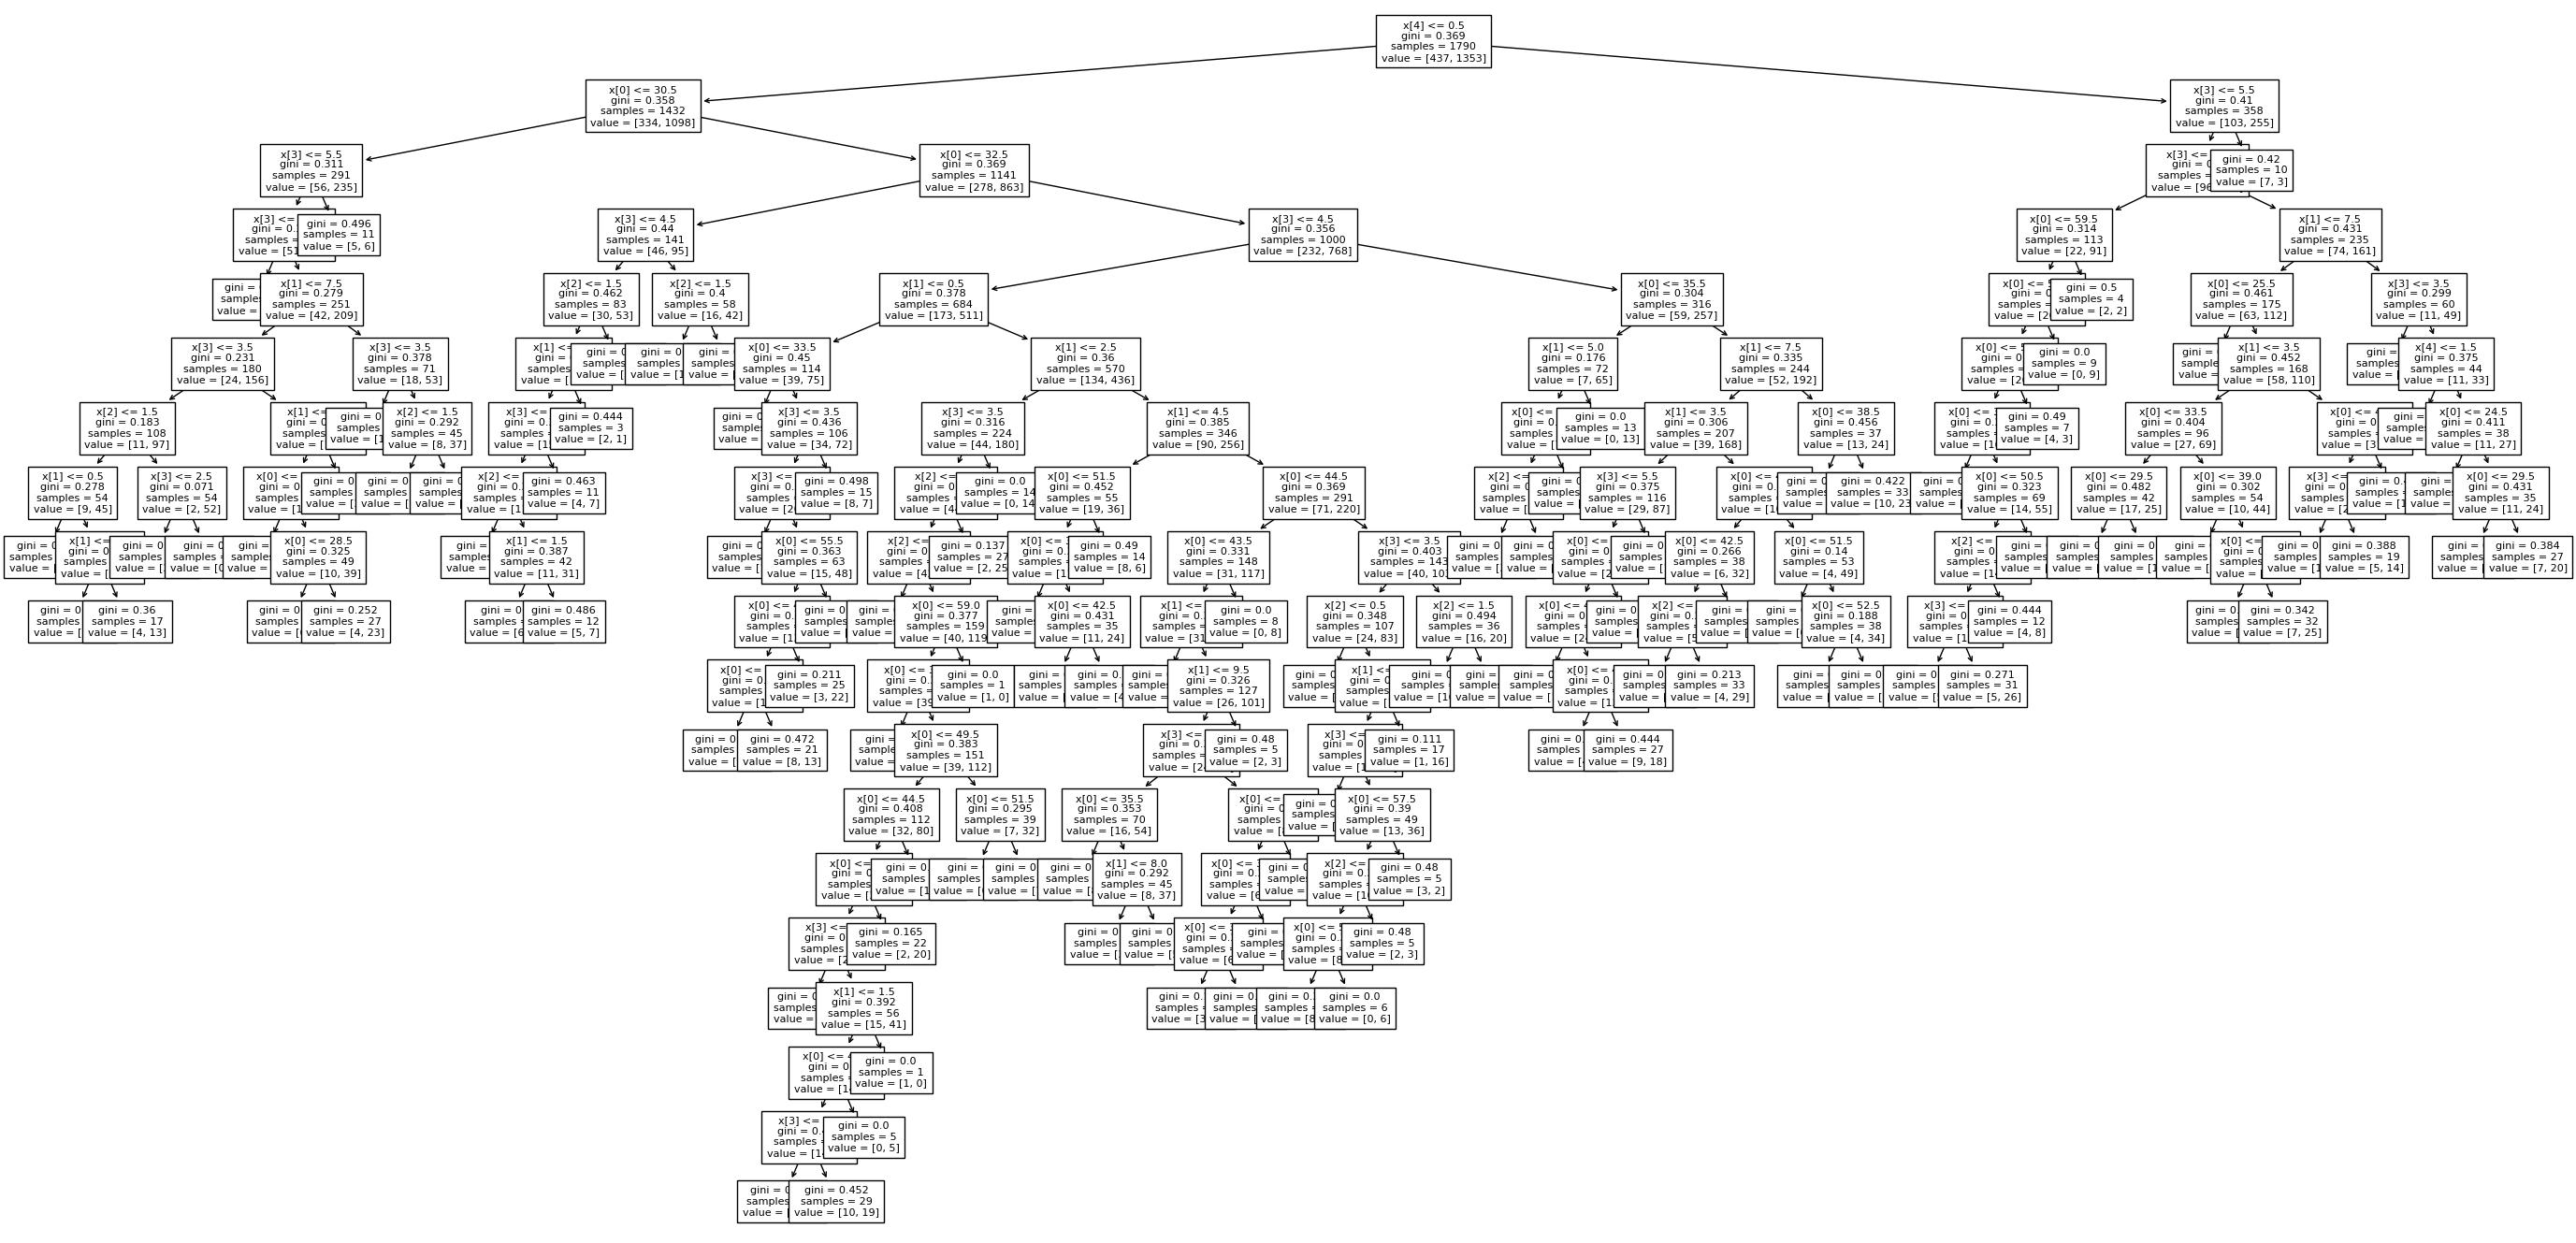

In [25]:
fig, ax = plt.subplots(figsize=(35, 17))
plot_tree(clf, ax=ax, fontsize=8)
plt.show()